In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns #sits on top of matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

C:\Users\Hana\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
fertility=pd.read_csv('Data/fertility.csv')

In [3]:
fertility.head()

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,spring,30,no,yes,yes,more than 3 months ago,once a week,occasional,16,Normal
1,spring,35,yes,no,yes,more than 3 months ago,once a week,daily,6,Altered
2,spring,27,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
3,spring,32,no,yes,yes,more than 3 months ago,hardly ever or never,never,7,Normal
4,spring,30,yes,yes,no,more than 3 months ago,once a week,never,9,Altered


In [4]:
fertility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
Season                                   100 non-null object
Age                                      100 non-null int64
Childish diseases                        100 non-null object
Accident or serious trauma               100 non-null object
Surgical intervention                    100 non-null object
High fevers in the last year             100 non-null object
Frequency of alcohol consumption         100 non-null object
Smoking habit                            100 non-null object
Number of hours spent sitting per day    100 non-null int64
Diagnosis                                100 non-null object
dtypes: int64(2), object(8)
memory usage: 7.9+ KB


In [5]:
fertility.isnull().sum()

Season                                   0
Age                                      0
Childish diseases                        0
Accident or serious trauma               0
Surgical intervention                    0
High fevers in the last year             0
Frequency of alcohol consumption         0
Smoking habit                            0
Number of hours spent sitting per day    0
Diagnosis                                0
dtype: int64

In [6]:
#nema null vrijednosti!!!

Preprocessing data!!

Since the most of data is txt we need to do big job on preprocessing!

In [7]:
#first column!

fertility['Season']

0     spring
1     spring
2     spring
3     spring
4     spring
5     spring
6     spring
7     spring
8       fall
9       fall
10      fall
11      fall
12      fall
13      fall
14      fall
15      fall
16      fall
17      fall
18      fall
19      fall
20      fall
21      fall
22      fall
23      fall
24      fall
25      fall
26      fall
27      fall
28      fall
29      fall
       ...  
70    spring
71    summer
72      fall
73    winter
74    winter
75    winter
76    winter
77    winter
78    winter
79    winter
80    spring
81    winter
82    spring
83    spring
84    spring
85    spring
86    spring
87    spring
88    spring
89    spring
90    spring
91    summer
92    summer
93    summer
94      fall
95    winter
96    winter
97    winter
98    winter
99    winter
Name: Season, Length: 100, dtype: object

In [8]:
# we see we have spring, summer, fall and winter! so we need instead of words make i to numbers!

In [10]:
label_season=LabelEncoder()
fertility['Season']=label_season.fit_transform(fertility['Season'])

In [12]:
fertility['Season'] # 0-Fall, 1-spring, 2-summer, 3-winter

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
70    1
71    2
72    0
73    3
74    3
75    3
76    3
77    3
78    3
79    3
80    1
81    3
82    1
83    1
84    1
85    1
86    1
87    1
88    1
89    1
90    1
91    2
92    2
93    2
94    0
95    3
96    3
97    3
98    3
99    3
Name: Season, Length: 100, dtype: int64

In [13]:
# now we check for child deseases

In [14]:
fertility['Childish diseases']

0      no
1     yes
2     yes
3      no
4     yes
5     yes
6      no
7     yes
8      no
9     yes
10    yes
11    yes
12    yes
13    yes
14    yes
15    yes
16    yes
17    yes
18    yes
19    yes
20     no
21    yes
22    yes
23    yes
24    yes
25    yes
26    yes
27    yes
28     no
29     no
     ... 
70    yes
71    yes
72    yes
73    yes
74    yes
75    yes
76    yes
77    yes
78    yes
79    yes
80    yes
81    yes
82    yes
83    yes
84    yes
85    yes
86    yes
87    yes
88    yes
89    yes
90    yes
91    yes
92    yes
93    yes
94    yes
95    yes
96    yes
97    yes
98    yes
99     no
Name: Childish diseases, Length: 100, dtype: object

In [15]:
label_disease=LabelEncoder()
fertility['Childish diseases']=label_disease.fit_transform(fertility['Childish diseases'])

In [16]:
fertility.head(5)

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,1,30,0,yes,yes,more than 3 months ago,once a week,occasional,16,Normal
1,1,35,1,no,yes,more than 3 months ago,once a week,daily,6,Altered
2,1,27,1,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
3,1,32,0,yes,yes,more than 3 months ago,hardly ever or never,never,7,Normal
4,1,30,1,yes,no,more than 3 months ago,once a week,never,9,Altered


In [17]:
# 0- no, 1 - yes!!

In [18]:
#same for accident of derious trauma!!

In [19]:
label_trauma=LabelEncoder()
fertility['Accident or serious trauma']=label_trauma.fit_transform(fertility['Accident or serious trauma'])

In [20]:
fertility.head(5)

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,1,30,0,1,yes,more than 3 months ago,once a week,occasional,16,Normal
1,1,35,1,0,yes,more than 3 months ago,once a week,daily,6,Altered
2,1,27,1,0,no,more than 3 months ago,hardly ever or never,never,9,Normal
3,1,32,0,1,yes,more than 3 months ago,hardly ever or never,never,7,Normal
4,1,30,1,1,no,more than 3 months ago,once a week,never,9,Altered


In [21]:
# again, 0- no, 1- yes

In [22]:
label_intervention=LabelEncoder()
fertility['Surgical intervention']=label_intervention.fit_transform(fertility['Surgical intervention'])

In [23]:
fertility.head(3)

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,1,30,0,1,1,more than 3 months ago,once a week,occasional,16,Normal
1,1,35,1,0,1,more than 3 months ago,once a week,daily,6,Altered
2,1,27,1,0,0,more than 3 months ago,hardly ever or never,never,9,Normal


In [24]:
# again, 0- no, 1- yes

In [25]:
# now explore fevers , how many options we have?

In [26]:
fertility['High fevers in the last year'] # again are these all? we need to use unique!

0     more than 3 months ago
1     more than 3 months ago
2     more than 3 months ago
3     more than 3 months ago
4     more than 3 months ago
5     more than 3 months ago
6     less than 3 months ago
7     more than 3 months ago
8     more than 3 months ago
9     more than 3 months ago
10    less than 3 months ago
11    more than 3 months ago
12    more than 3 months ago
13    more than 3 months ago
14    more than 3 months ago
15    more than 3 months ago
16    more than 3 months ago
17    more than 3 months ago
18    more than 3 months ago
19    more than 3 months ago
20    more than 3 months ago
21    more than 3 months ago
22    more than 3 months ago
23    less than 3 months ago
24    more than 3 months ago
25    more than 3 months ago
26    more than 3 months ago
27                        no
28    more than 3 months ago
29    more than 3 months ago
               ...          
70    less than 3 months ago
71                        no
72                        no
73            

In [28]:
fertility['High fevers in the last year'].unique() # now we can see how many are there and now we can each case dedicate number

array(['more than 3 months ago', 'less than 3 months ago', 'no'],
      dtype=object)

In [29]:
label_fever=LabelEncoder()
fertility['High fevers in the last year']=label_fever.fit_transform(fertility['High fevers in the last year'])

In [30]:
fertility['High fevers in the last year'].unique()

array([1, 0, 2], dtype=int64)

In [31]:
# more than 3 months ago - 1
# less - 0
# no - 2

In [33]:
fertility.head(10)

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,1,30,0,1,1,1,once a week,occasional,16,Normal
1,1,35,1,0,1,1,once a week,daily,6,Altered
2,1,27,1,0,0,1,hardly ever or never,never,9,Normal
3,1,32,0,1,1,1,hardly ever or never,never,7,Normal
4,1,30,1,1,0,1,once a week,never,9,Altered
5,1,30,1,0,1,1,once a week,occasional,9,Normal
6,1,30,0,0,0,0,once a week,never,8,Normal
7,1,36,1,1,1,1,several times a week,never,7,Normal
8,0,30,0,0,1,1,once a week,never,5,Normal
9,0,29,1,0,0,1,hardly ever or never,never,5,Normal


In [34]:
# same we check for Frequency of alcohol consuption

In [35]:
fertility['Frequency of alcohol consumption'].unique()

array(['once a week', 'hardly ever or never', 'several times a week',
       'several times a day', 'every day'], dtype=object)

In [36]:
label_alcohol=LabelEncoder()
fertility['Frequency of alcohol consumption']=label_alcohol.fit_transform(fertility['Frequency of alcohol consumption'])
fertility['Frequency of alcohol consumption'].unique()

array([2, 1, 4, 3, 0], dtype=int64)

In [37]:
#'once a week' - 2, 'hardly ever or never' - 1, 'several times a week' - 4,'several times a day' - 3, 'every day' - 0

In [38]:
fertility.head(10)

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,1,30,0,1,1,1,2,occasional,16,Normal
1,1,35,1,0,1,1,2,daily,6,Altered
2,1,27,1,0,0,1,1,never,9,Normal
3,1,32,0,1,1,1,1,never,7,Normal
4,1,30,1,1,0,1,2,never,9,Altered
5,1,30,1,0,1,1,2,occasional,9,Normal
6,1,30,0,0,0,0,2,never,8,Normal
7,1,36,1,1,1,1,4,never,7,Normal
8,0,30,0,0,1,1,2,never,5,Normal
9,0,29,1,0,0,1,1,never,5,Normal


In [39]:
fertility['Smoking habit'].unique()

array(['occasional', 'daily', 'never'], dtype=object)

In [40]:
label_smoking=LabelEncoder()
fertility['Smoking habit']=label_smoking.fit_transform(fertility['Smoking habit'])
fertility['Smoking habit'].unique()

array([2, 0, 1], dtype=int64)

In [41]:
# 'occasional' - 2, 'daily' - 0, 'never' - 1

In [42]:
fertility.head(10)

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,1,30,0,1,1,1,2,2,16,Normal
1,1,35,1,0,1,1,2,0,6,Altered
2,1,27,1,0,0,1,1,1,9,Normal
3,1,32,0,1,1,1,1,1,7,Normal
4,1,30,1,1,0,1,2,1,9,Altered
5,1,30,1,0,1,1,2,2,9,Normal
6,1,30,0,0,0,0,2,1,8,Normal
7,1,36,1,1,1,1,4,1,7,Normal
8,0,30,0,0,1,1,2,1,5,Normal
9,0,29,1,0,0,1,1,1,5,Normal


In [43]:
# also we need to transform column diagnosis which we wanna find out !!!!!

In [44]:
fertility['Diagnosis'].unique()

array(['Normal', 'Altered'], dtype=object)

In [45]:
label_fert=LabelEncoder()
fertility['Diagnosis']=label_fert.fit_transform(fertility['Diagnosis'])
fertility['Diagnosis'].unique()

array([1, 0], dtype=int64)

In [46]:
#'Normal' - 1, 'Altered' - 0

In [47]:
fertility.head(10)

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,1,30,0,1,1,1,2,2,16,1
1,1,35,1,0,1,1,2,0,6,0
2,1,27,1,0,0,1,1,1,9,1
3,1,32,0,1,1,1,1,1,7,1
4,1,30,1,1,0,1,2,1,9,0
5,1,30,1,0,1,1,2,2,9,1
6,1,30,0,0,0,0,2,1,8,1
7,1,36,1,1,1,1,4,1,7,1
8,0,30,0,0,1,1,2,1,5,1
9,0,29,1,0,0,1,1,1,5,1


In [48]:
# now we can see some data and create graphs

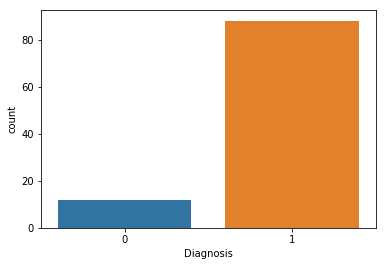

In [49]:
sns.countplot(fertility['Diagnosis'])

In [50]:
# we can see that most cases in fertility are normal, but some of them are altered

In [51]:
# separate data

X = fertility.drop('Diagnosis', axis=1)
y = fertility['Diagnosis']

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [53]:
# First we will se without standard scaler and after with to see is there any difference on this dataset?

Random Forest Class

In [54]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
rfc_pred=rfc.predict(X_test)
rfc_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [56]:
#let's see accuracy of the model!!

In [57]:
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.50      1.00      0.67         2
          1       1.00      0.93      0.96        28

avg / total       0.97      0.93      0.94        30

[[ 2  0]
 [ 2 26]]


In [58]:
#really great result!!

SVM

In [59]:
clf=svm.SVC()

In [61]:
clf.fit(X_train,y_train)
clf_pred=clf.predict(X_test)
clf_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [62]:
print(classification_report(y_test,clf_pred))
print(confusion_matrix(y_test,clf_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         2
          1       0.93      1.00      0.97        28

avg / total       0.87      0.93      0.90        30

[[ 0  2]
 [ 0 28]]


C:\Users\Hana\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [63]:
# weaker result!

Neural Network

In [65]:
nlpc=MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
nlpc.fit(X_train,y_train)
nlpc_pred=nlpc.predict(X_test)
nlpc_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [66]:
print(classification_report(y_test,nlpc_pred))
print(confusion_matrix(y_test,nlpc_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         2
          1       0.93      1.00      0.97        28

avg / total       0.87      0.93      0.90        30

[[ 0  2]
 [ 0 28]]


C:\Users\Hana\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [67]:
# same as svm

With Satndard SCaler

In [68]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [69]:
X_train

array([[-1.0472242 , -0.93610908, -2.60341656, -0.94440028, -0.94440028,
         1.33333333,  0.06654846,  1.35607299,  0.13949187],
       [-0.19483241,  2.16317098,  0.38411064,  1.05887304, -0.94440028,
         1.33333333, -0.86513002, -0.01965323, -0.03621768],
       [-0.19483241,  1.27766239,  0.38411064,  1.05887304,  1.05887304,
         1.33333333,  0.06654846, -0.01965323, -0.13662314],
       [-0.19483241, -1.37886337,  0.38411064, -0.94440028, -0.94440028,
         1.33333333,  0.06654846,  1.35607299, -0.1617245 ],
       [-0.19483241, -0.93610908,  0.38411064,  1.05887304, -0.94440028,
         1.33333333, -0.86513002, -0.01965323,  0.03908641],
       [-1.0472242 ,  0.8349081 ,  0.38411064,  1.05887304, -0.94440028,
         1.33333333,  1.92990543, -0.01965323, -0.13662314],
       [-1.0472242 ,  0.8349081 ,  0.38411064,  1.05887304,  1.05887304,
        -0.33333333, -0.86513002, -1.39537945, -0.18682587],
       [-0.19483241, -0.93610908,  0.38411064,  1.05887304, -0

Random Forest Class

In [70]:
rfc2 = RandomForestClassifier()
rfc2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
rfc2_pred=rfc2.predict(X_test)
print(classification_report(y_test,rfc2_pred))
print(confusion_matrix(y_test,rfc2_pred))

             precision    recall  f1-score   support

          0       0.50      0.50      0.50         2
          1       0.96      0.96      0.96        28

avg / total       0.93      0.93      0.93        30

[[ 1  1]
 [ 1 27]]


In [72]:
#better precision and we have smaller accuracy!!

SVM

In [73]:
clf2=svm.SVC()
clf2.fit(X_train,y_train)
clf2_pred=clf2.predict(X_test)
clf2_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [74]:
print(classification_report(y_test,clf2_pred))
print(confusion_matrix(y_test,clf2_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         2
          1       0.93      1.00      0.97        28

avg / total       0.87      0.93      0.90        30

[[ 0  2]
 [ 0 28]]


C:\Users\Hana\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [75]:
#same result

In [76]:
nlpc2=MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
nlpc2.fit(X_train,y_train)
nlpc2_pred=nlpc2.predict(X_test)
nlpc2_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [77]:
print(classification_report(y_test,nlpc2_pred))
print(confusion_matrix(y_test,nlpc2_pred))

             precision    recall  f1-score   support

          0       0.50      1.00      0.67         2
          1       1.00      0.93      0.96        28

avg / total       0.97      0.93      0.94        30

[[ 2  0]
 [ 2 26]]


In [78]:
#Great accuracy!!!!!!!!!!!!!!!!!

1. When we didn't normlaize values than the greatest accuracy was given by Random Forest Class - 97%
2. whwn we did normalize values than the greatest accuracy was given vy Neural Netwroks - 97%